<a href="https://colab.research.google.com/github/Om-krishna/CV_ASSIGNMENT/blob/main/Savyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install matplotlib numpy TensorFlow tensorflow_hub pillow

     |████████████████████████████████| 462 kB 8.5 MB/s 


In [5]:
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as tf_hub
import PIL

In [6]:
def load_image(image_path, image_size=(512, 256)):
    img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

In [7]:
def visualize(images, titles=('',)):
    noi = len(images)
    image_sizes = [image.shape[1] for image in images]
    w = (image_sizes[0] * 6) // 320
    plt.figure(figsize=(w  * noi, w))
    grid_look = gridspec.GridSpec(1, noi, width_ratios=image_sizes)
    
    for i in range(noi):
        plt.subplot(grid_look[i])
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')
        plt.title(titles[i])
        plt.savefig("final.jpg")
    plt.show()

In [9]:
original_image = load_image("/content/original.jpeg")
style_image = load_image("/content/style.jpeg")

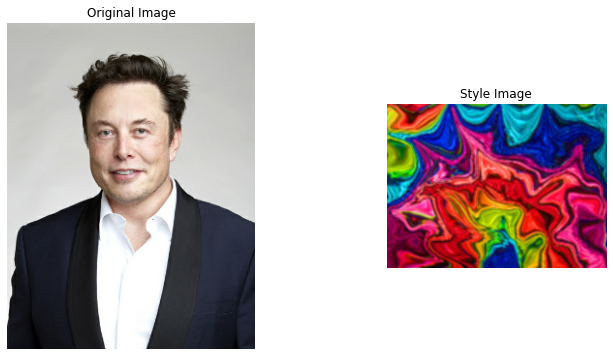

In [10]:
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='VALID')
visualize([original_image, style_image], ['Original Image', 'Style Image'])

In [12]:
import tensorflow as tf

In [16]:
stylize_model = tf_hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [23]:
results = stylize_model(tf.constant(original_image), tf.constant(style_image))
stylized_image = results[0]

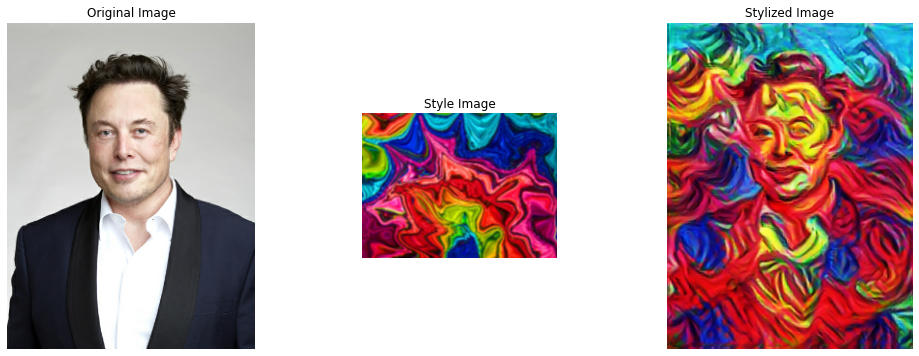

In [20]:
visualize([original_image, style_image, stylized_image], titles=['Original Image', 'Style Image', 'Stylized Image'])

# New Section